In [2]:
import sqlite3

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step-1: Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [ ]:
# Step-2: Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [ ]:
# Step 3: Insert sample data
sample_data = [
    ("Apple", 10, 2.5),
    ('Banana',20,1.5),
    ('Orange',15,3.0),
    ('Apple',5,2.5),
    ('Banana',10,1.5)
]
cursor.executemany("INSERT INTO sales(product, quantity,price)VALUES(?,?,?)",sample_data)
conn.commit()

In [ ]:
# Step-4: Run SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
Group by product
"""
df = pd.read_sql_query(query,conn)

In [ ]:
# Step-5: Print results
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         30     75.0
1  Banana         60     90.0
2  Orange         30     90.0


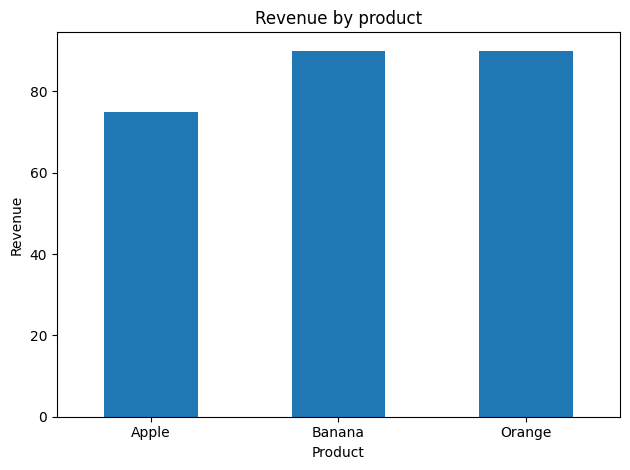

In [ ]:
# Step-6: Plot bar chart
df.plot(kind="bar", x="product", y="revenue", legend= False)
plt.title("Revenue by product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


conn.close()